# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 25px; color: #2D2926; text-align: center; line-height: 0.75;background-color: #41dcf7"><b>Susupervised Learning on Spaceship Titanic: Classification problem</b><br></h1>

### Problem Statement:

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

### Data Dictionary:

- **PassengerId**: A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- **HomePlanet**: The planet the passenger departed from, typically their planet of permanent residence.
- **CryoSleep**: Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- **Cabin**: The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- **Destination**: The planet the passenger will be debarking to.
- **Age**: The age of the passenger.
- **VIP**: Whether the passenger has paid for special VIP service during the voyage.
- **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck**: Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- **Name**: The first and last names of the passenger.
- **Transported**: Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

### Links:

[Spaceship Titanic Comptetion on Kaggle](https://www.kaggle.com/competitions/spaceship-titanic)

# <center><div style="font-family: Trebuchet MS; background-color: #41dcf7; color: #2D2926; padding: 12px; line-height: 1;">Data Preprocessing/Information</div></center>

### Importing Libraries:

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import plotly.express as px
from scipy import stats
from scipy.stats import uniform, randint
import missingno
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.classifier import StackingCVClassifier
import warnings
warnings.filterwarnings('ignore')

### Data Reading:

In [2]:
df_train = pd.read_csv('../input/spaceship-titanic/train.csv')
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<AxesSubplot:ylabel='% of NaN'>

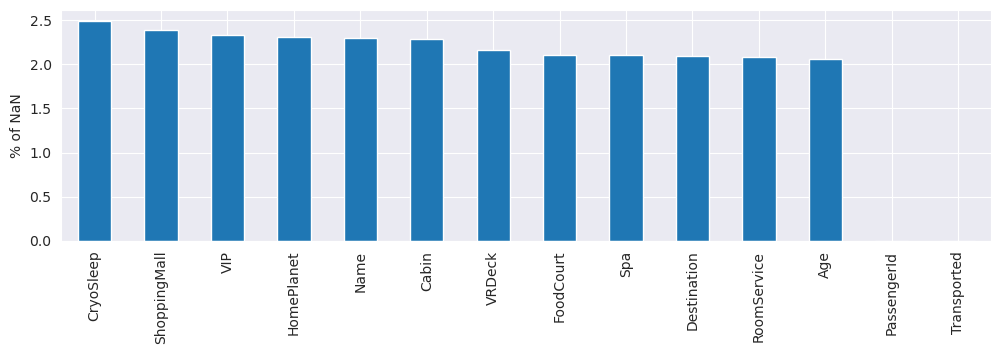

In [3]:
(df_train.isna().sum().sort_values(ascending=False)/df_train.shape[0]*100).plot.bar(figsize=(12,3), ylabel='% of NaN')

In [4]:
df_test = pd.read_csv('../input/spaceship-titanic/test.csv')
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


<AxesSubplot:ylabel='% of NaN'>

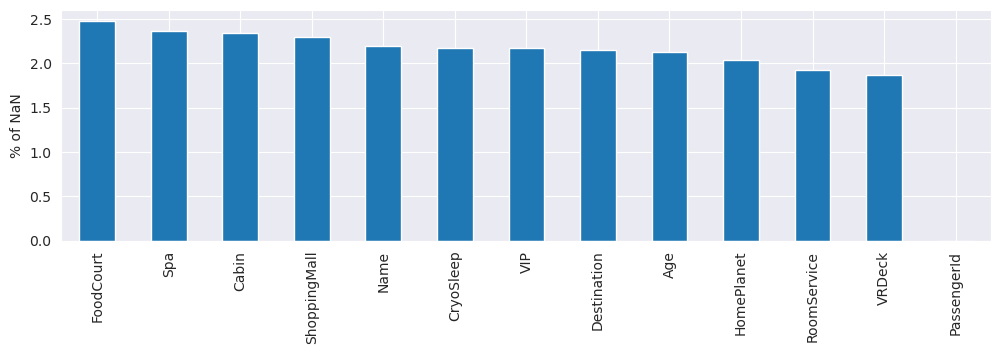

In [5]:
(df_test.isna().sum().sort_values(ascending=False)/df_test.shape[0]*100).plot.bar(figsize=(12,3), ylabel='% of NaN')

In [6]:
print(f'Train set size: {df_train.shape}')
print(f'Test set size: {df_test.shape}')

Train set size: (8693, 14)
Test set size: (4277, 13)


In [7]:
df_all = pd.concat([df_train, df_test], ignore_index=True)
df_all.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Missing Values Matrix:

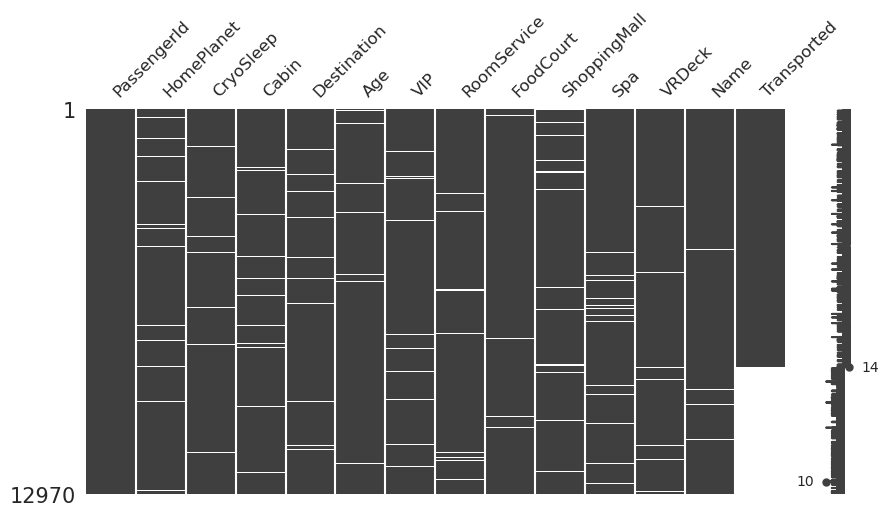

In [8]:
missingno.matrix(df_all,figsize=(10,5), fontsize=12);

### Data info:

In [9]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.4+ MB


In [10]:
cols_obj = df_all.select_dtypes('object').columns
cols_dif = df_all.columns.difference(cols_obj)
print('Obj Cols:')
display(df_all[cols_obj].describe())
print('\n')
print('Obj others:')
display(df_all[cols_dif].describe())

Obj Cols:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,12970,12682,12660,12671,12696,12674,12676,8693
unique,12970,3,2,9825,3,2,12629,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Carry Contrevins,True
freq,1,6865,8079,8,8871,12401,2,4378




Obj others:


,Age,FoodCourt,RoomService,ShoppingMall,Spa,VRDeck
count,12700.000000,12681.000000,12707.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,451.961675,222.897852,174.906033,308.476904,306.789482
std,14.387261,1584.370747,647.596664,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,77.000000,49.000000,29.000000,57.000000,42.000000
max,79.000000,29813.000000,14327.000000,23492.000000,22408.000000,24133.000000


# <center><div style="font-family: Trebuchet MS; background-color: #41dcf7; color: #2D2926; padding: 12px; line-height: 1;">Exploratory Data Analysis</div></center>

### Feature Relationships:

In [11]:
cols_plot = cols_dif.insert(-1, 'Transported')
fig = px.scatter_matrix(df_train[cols_plot], width=1300, height=650)
fig.update_layout(title = 'Feature Relationships')
fig.show()

<AxesSubplot:>

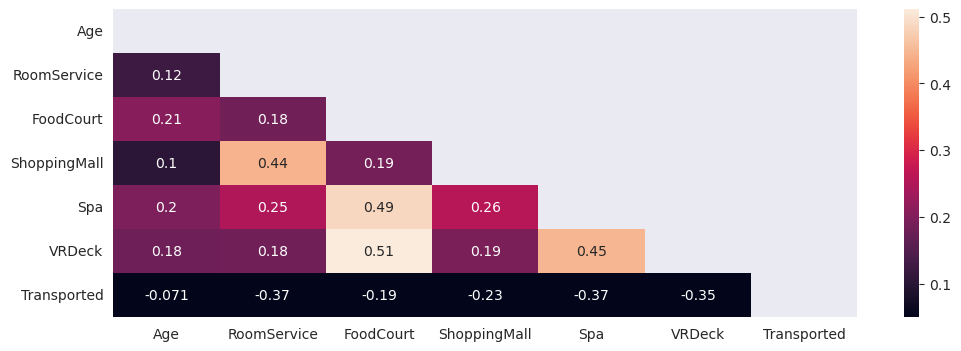

In [12]:
coors = df_train.corr(method='spearman')
mask = np.zeros_like(coors, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(coors, mask=mask, vmin=0.05, annot=True)

### Data distribution:

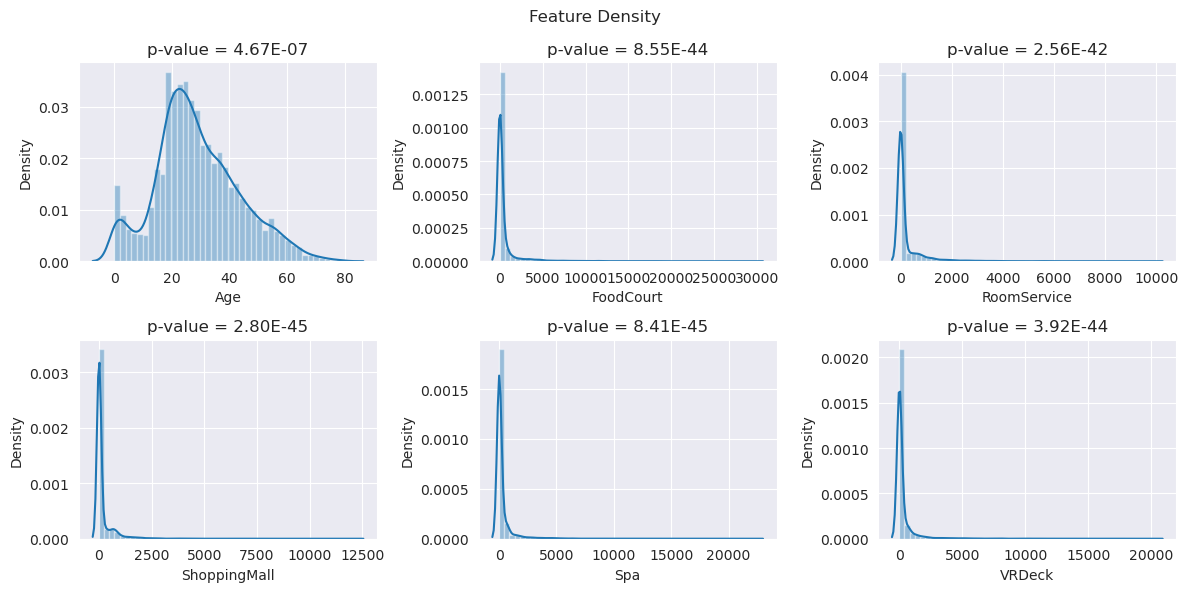

In [13]:
df_dist = df_all.dropna()
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
fig.suptitle('Feature Density')

for i, name in enumerate(cols_dif):
    plt.subplot(2,3,i+1)
    sns.distplot(df_dist[name]) #, kde=False, fit=stats.norm
    plt.ylabel('Density')
    plt.title(f'p-value = {stats.shapiro(df_dist[name].sample(frac = 0.1)).pvalue:.2E}')
fig.tight_layout()

# <center><div style="font-family: Trebuchet MS; background-color: #41dcf7; color: #2D2926; padding: 12px; line-height: 1;">Feature Engineering</div></center>

###  In summary, what was done:
- The 'LastName' column was created by splitting the 'Name' column, and later used to fill in the NaNs by grouping passengers based on their last name.
- Similarly, the 'Group' and 'NGroup' columns were created by splitting the 'PassengerId' column, and were then used to fill in NaNs by grouping families together.
- The 'Age' feature was converted into age groups, with an additional category 'Zero' when the age is equal to 0.
- 'Deck' and 'Side' features were created by splitting 'Cabin' column.
- NaN values in numerical features have been filled with the mode, which is basically zero, implying that the passenger has not spent anything.
- Basically, categorical features were filled first by the mode of each group defined by the new column 'Group', then by the mode of each group defined by the new column 'LastName', and lastly by the mode of the entire column.
- The columns without importance were dropped. 
- Finally, one-hot encoding was applied to the categorical features.

In [14]:
def fillna_byGroupby(df, cols, group_col):
    df_changed = df.copy().dropna(subset = [group_col])
    fun = lambda x: np.nan if x.mode().empty else x.mode()[0]
    for col in cols:
        df_changed[col] = df_changed.groupby(group_col)[col].transform(lambda x: x.fillna(x.agg(fun)))
        
    #update the original 'df' DataFrame with the changes from 'df_changed'
    drop_idx = df.index.difference(df_changed.index) #Index of rows dropped
    df.loc[df.index.difference(drop_idx), :] = df_changed #Updates all rows that have not been dropped
    return df
def fillpipe_zero(df):
    #FILL AgeGroup with 'Zero' if Age=0 (new category)
    df['AgeGroup'] = df['AgeGroup'].cat.add_categories(['Zero'])
    df.loc[df['Age'] == 0, 'AgeGroup'] = 'Zero'
    return df

def feature_engineering(df):
    #Age Group 
    bins = [0, 18, 25, 40, 60, 100]
    labels=['Under 18', '18-25', '26-35', '36-60', 'Over 60']
    
    cols_fillmode = ['RoomService',	'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    cols_fillmode_byGroup = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'AgeGroup', 'VIP']
    cols_fillmode_byLastName = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'AgeGroup', 'VIP']
    return (df.assign(LastName = df['Name'].str.split().str[-1],
                      Group = df['PassengerId'].str.split('_').str[0],
                      Ngroup = df['PassengerId'].str.split('_').str[-1],
                      AgeGroup = pd.cut(df.Age, bins=bins, labels=labels),
                      Transported = df.Transported.replace({True: 1, False: 0})
                     )
            .pipe(fillpipe_zero)
            .apply(lambda x: x.fillna(x.mode()[0]) if x.name in cols_fillmode else x)
            .pipe(fillna_byGroupby, cols_fillmode_byGroup, 'Group')
            .pipe(fillna_byGroupby, cols_fillmode_byLastName, 'LastName')
            .assign(Deck = df['Cabin'].str.split('/').str[0],
                    #Num = df['Cabin'].str.split('/').str[1],
                    Side = df['Cabin'].str.split('/').str[2])
            .apply(lambda x: x.fillna(x.mode()[0]) if not x.name == 'Transported' else x)
            .drop(['PassengerId','Name','Age', 'Group', 'Ngroup', 'Cabin', 'LastName'], axis=1)
            .pipe(pd.get_dummies, columns = ['HomePlanet', 'Destination', 'AgeGroup', 'Deck', 'Side'])
            )

### Feature Engineering Result:

In [15]:
df_fe = feature_engineering(df_all)
df_fe

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,0.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0,...,0,0,0,0,0,0,1,0,0,1
12966,0.0,0.0,0.0,847.0,17.0,10.0,144.0,NaN,1,0,...,0,0,0,0,0,1,0,0,0,1
12967,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,...,0,0,0,1,0,0,0,0,1,0
12968,0.0,0.0,0.0,2680.0,0.0,0.0,523.0,NaN,0,1,...,0,0,0,1,0,0,0,0,1,0


# <center><div style="font-family: Trebuchet MS; background-color: #41dcf7; color: #2D2926; padding: 12px; line-height: 1;">Machine Learning Model</div></center>

### Training and Test Datasets:

In [16]:
#Dataset to train and test the models:
df_train = df_fe.dropna(subset = ['Transported'])
X_train = df_train.drop('Transported', axis=1)
y_train = df_train['Transported']
#Kaggle Dataset:
df_kaggle = df_fe.loc[df_fe['Transported'].isna(), :].drop('Transported', axis=1)

### Cross-Validation:

In [17]:
n_random = 86
kf = KFold(5, shuffle=True, random_state=n_random)

def cross_val(model,X=X_train, y=y_train, kf=kf):
    return cross_val_score(estimator=model, X=X, y=y, scoring='accuracy', cv=kf, n_jobs=-1)

### Logistic Regression:

In [18]:
param_logistic = {'logisticregression__C': [100, 10, 1.0, 0.1, 0.01],
                  'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                  'logisticregression__max_iter': [2000, 5000, 10000]
}

model_logistic = make_pipeline(RobustScaler(),
                              LogisticRegression(solver='saga', max_iter=5000))
#model_logistic_RS = RandomizedSearchCV(model_logistic, param_distributions=param_logistic, n_iter=10, cv=kf, scoring='accuracy', n_jobs=-1)
#model_logistic_RS.fit(X_train, y_train)
#print('Best hyperparameters:', model_logistic_RS.best_params_)
print(f'Accuracy={cross_val(model_logistic).mean():.3f}')

Accuracy=0.792


### KNeighborsClassifier Model:

In [19]:
param_KNeighbors = {'kneighborsclassifier__n_neighbors': [2, 5, 8, 12, 16, 21],
                    'kneighborsclassifier__weights': ['uniform', 'distance'],
                    'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski'],
                    'kneighborsclassifier__leaf_size': randint(10, 100),
                    'kneighborsclassifier__p': [1, 2, 3],
                    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}


model_KNeighbors =  make_pipeline(RobustScaler(),
                                  KNeighborsClassifier(n_neighbors=21))
#model_KNeighbors_RS = RandomizedSearchCV(model_KNeighbors, param_distributions=param_KNeighbors, n_iter=20, cv=kf, scoring='accuracy', n_jobs=-1)
#model_KNeighbors_RS.fit(X_train, y_train)
#print('Best hyperparameters:', model_KNeighbors_RS.best_params_)
print(f'Accuracy={cross_val(model_KNeighbors).mean():.3f}')

Accuracy=0.793


### GradientBoostingClassifier Model:

In [20]:
param_GBC = {
    'gradientboostingclassifier__learning_rate': [0.001, 0.01, 0.1],
    'gradientboostingclassifier__n_estimators': [10, 50, 100, 150, 200],
    'gradientboostingclassifier__max_depth': [3, 5, 7, 9],
    'gradientboostingclassifier__min_samples_split': [2, 4, 6],
    'gradientboostingclassifier__min_samples_leaf': [1, 2, 3],
    'gradientboostingclassifier__subsample': [0.5, 0.7, 1.0] 
}

model_GBC =  make_pipeline(RobustScaler(),
                                  GradientBoostingClassifier(n_estimators=100, min_samples_split=6,
                                                            min_samples_leaf=2, max_depth=5, learning_rate=0.1))

#model_GBC_RS = RandomizedSearchCV(model_GBC, param_distributions=param_GBC, n_iter=30, cv=kf, scoring='accuracy', n_jobs=-1)
#model_GBC_RS.fit(X_train, y_train)
#print('Best hyperparameters:', model_GBC_RS.best_params_)
print(f'Accuracy={cross_val(model_GBC).mean():.3f}')

Accuracy=0.800


### XGBClassifier Model:

In [21]:
param_XGB = {
    'xgbclassifier__learning_rate': uniform(0, 1),
    'xgbclassifier__max_depth': randint(3, 10),
    'xgbclassifier__subsample': uniform(0.5, 0.5),
    'xgbclassifier__colsample_bytree': uniform(0.5, 0.5),
    'xgbclassifier__reg_alpha': uniform(0, 1),
    'xgbclassifier__reg_lambda': uniform(0, 1),
    'xgbclassifier__n_estimators': [10, 50, 100, 200, 300]
}

model_XGB =  make_pipeline(RobustScaler(),
                                  xgb.XGBClassifier(learning_rate=0.01,max_depth=3, n_estimators=1200,
                                                    colsample_bytree=0.6, subsample=0.77, nthread=-1))

#model_XGB_RS = RandomizedSearchCV(model_XGB, param_distributions=param_XGB, n_iter=50, cv=kf, scoring='accuracy', n_jobs=-1)
#model_XGB_RS.fit(X_train, y_train)
#print('Best hyperparameters:', model_XGB_RS.best_params_)
print(f'Accuracy={cross_val(model_XGB).mean():.3f}')

Accuracy=0.801


### StackingCVClassifier Model:

In [22]:
model_Stacking = StackingCVClassifier(classifiers=[model_logistic, model_KNeighbors, model_GBC],
                     meta_classifier=model_XGB, random_state=n_random, n_jobs=-1, cv=kf)
model_Stacking.fit(X_train, y_train)
print(f'Accuracy={cross_val(model_Stacking).mean():.3f}')

Accuracy=0.799


In [23]:
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators=[('lo', model_logistic), ('kn', model_KNeighbors), ('gbc', model_GBC), 
                                        ('xgb', model_XGB), ('sta',model_Stacking)], voting='soft', weights=[1,1,1,1,2])
                            #weights=[0.15, 0.15, 0.15, 0.2, 0.35])
ensemble.fit(X_train, y_train)
print(f'Accuracy={cross_val(ensemble).mean():.3f}')

Accuracy=0.800


### Submission:

In [24]:
df_submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 
                             'Transported': ensemble.predict(df_kaggle)})
df_submission['Transported'] = df_submission.Transported.astype(bool)
df_submission.to_csv('submission.csv', index=False)